In [2]:
import pandas as pd
import re
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Discovering data

In [3]:
raw_data=pd.read_csv('survey_results_public.csv')
print('my public survey has {} in shape'.format(raw_data.shape))

my public survey has (83439, 48) in shape


In [4]:
raw_cop=raw_data.copy()

In [5]:
raw_data.sample(5)

ResponseId                                         MainBranch  \
34218       34219  I am not primarily a developer, but I write co...   
17115       17116                     I am a developer by profession   
62485       62486             I am a student who is learning to code   
10297       10298                     I am a developer by profession   
58223       58224                     I am a developer by profession   

               Employment                   Country US_State UK_Country  \
34218  Employed part-time                    Serbia      NaN        NaN   
17115  Employed full-time                   Austria      NaN        NaN   
62485  Student, full-time                  Pakistan      NaN        NaN   
10297  Employed full-time  United States of America     Utah        NaN   
58223  Employed full-time                    Poland      NaN        NaN   

                                                 EdLevel     Age1stCode  \
34218                Associate degree (A.A., A.S., etc.)  11 - 17 years   
17115       Bachelor’s degree (B.A., B.S., B.Eng., etc.)  11 - 17 years   
62485       Bachelor’s degree (B.A., B.S., B.Eng., etc.)  11 - 17 years   
10297  Some college/university study without earning ...  11 - 17 years   
58223    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)  11 - 17 years   

                                               LearnCode YearsCode  ...  \
34218                                             School         5  ...   
17115                      School;Books / Physical media        21  ...   
62485                                             School         2  ...   
10297  Coding Bootcamp;Other online resources (ex: vi...         3  ...   
58223                             Books / Physical media         7  ...   

                   Age Gender Trans                Sexuality  \
34218  18-24 years old    Man    No  Straight / Heterosexual   
17115  25-34 years old    Man    No  Straight / Heterosexual   
62485  18-24 years old  Woman    No  Straight / Heterosexual   
10297  25-34 years old    Man    No  Straight / Heterosexual   
58223  25-34 years old    Man    No  Straight / Heterosexual   

                                               Ethnicity      Accessibility  \
34218                       White or of European descent  None of the above   
17115                       White or of European descent  None of the above   
62485                                        South Asian  None of the above   
10297  White or of European descent;Hispanic or Latin...  None of the above   
58223                       White or of European descent  None of the above   

                                            MentalHealth  \
34218                                  None of the above   
17115  I have a concentration and/or memory disorder ...   
62485                                  None of the above   
10297                                  None of the above   
58223                                  None of the above   

                SurveyLength                  SurveyEase ConvertedCompYearly  
34218               Too long                        Easy             13212.0  
17115  Appropriate in length                        Easy             76750.0  
62485  Appropriate in length  Neither easy nor difficult                 NaN  
10297              Too short                        Easy            105000.0  
58223  Appropriate in length                        Easy             73406.0  

[5 rows x 48 columns]

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [7]:
raw_data.sample(1).iloc[0]

ResponseId                                                                  45975
MainBranch                                         I am a developer by profession
Employment                      Independent contractor, freelancer, or self-em...
Country                                                                     India
US_State                                                                      NaN
UK_Country                                                                    NaN
EdLevel                         Secondary school (e.g. American high school, G...
Age1stCode                                                          18 - 24 years
LearnCode                         Other online resources (ex: videos, blogs, etc)
YearsCode                                                                       1
YearsCodePro                                                     Less than 1 year
DevType                                                         Developer, mobile
OrgSize         

### Remarks:
- All our columns are object, <strong>weird!!</strong>

In [8]:
raw_data.describe()

ResponseId     CompTotal  ConvertedCompYearly
count  83439.000000  4.718300e+04         4.684400e+04
mean   41720.000000  2.119407e+69         1.184262e+05
std    24086.908893  4.603702e+71         5.272944e+05
min        1.000000  0.000000e+00         1.000000e+00
25%    20860.500000  1.600000e+04         2.702500e+04
50%    41720.000000  6.700000e+04         5.621100e+04
75%    62579.500000  1.400000e+05         1.000000e+05
max    83439.000000  1.000000e+74         4.524131e+07

In [9]:
# i can notice that, basicaly we need Age,Age1stCode, LearnCode,YearsCode columns to be numerical
# why they are object

#let's see why 
should_be_num=['Age1stCode','YearsCode','Age','YearsCodePro']

for i in should_be_num:
    print(i)
    print(raw_data[i].unique().tolist())
    print('----------------')

Age1stCode
['18 - 24 years', '11 - 17 years', '5 - 10 years', '25 - 34 years', '35 - 44 years', 'Younger than 5 years', '45 - 54 years', '55 - 64 years', nan, 'Older than 64 years']
----------------
YearsCode
[nan, '7', '17', '3', '4', '6', '16', '12', '15', '10', '40', '9', '26', '14', '39', '20', '8', '19', '5', 'Less than 1 year', '22', '2', '1', '34', '21', '13', '25', '24', '30', '31', '18', '38', 'More than 50 years', '27', '41', '42', '35', '23', '28', '11', '37', '44', '43', '36', '33', '45', '29', '50', '46', '32', '47', '49', '48']
----------------
Age
['25-34 years old', '18-24 years old', '35-44 years old', 'Prefer not to say', '45-54 years old', 'Under 18 years old', '65 years or older', '55-64 years old', nan]
----------------
YearsCodePro
[nan, '10', '4', '5', '6', '2', '30', '9', '18', '12', '21', '1', '16', 'Less than 1 year', '15', '3', '35', '7', '8', '17', '14', '26', '25', '20', '50', '34', '11', '24', '22', '13', '31', '23', '39', '41', '27', '28', '19', '33', 'Mo

In [10]:
Dict={
    'YearsCodePro' :{'Less than 1 year':0,'More than 50 years':51},
    'YearsCode':{'More than 50 years':51,'Less than 1 year':0}
}

for i,r in Dict.items():
    raw_cop[i]=raw_cop[i].replace(r).astype(np.float32)


In [11]:
raw_cop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  float32
 10  YearsCodePro                  61216 non-null  float32
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [12]:
object_col=raw_cop.select_dtypes(include='object').columns.to_list()

In [13]:
print(object_col)

['MainBranch', 'Employment', 'Country', 'US_State', 'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'DevType', 'OrgSize', 'Currency', 'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys', 'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength', 'SurveyEase']


In [14]:
for c in object_col:
    raw_cop[c]=raw_cop[c].apply(lambda x:x.split(';') if x is not np.nan else [])

In [15]:
i = raw_cop.sample(1).index[0]
print(raw_data['MiscTechHaveWorkedWith'].iloc[i])
print(raw_cop['MiscTechHaveWorkedWith'].iloc[i])

React Native
['React Native']


In [16]:
i = raw_cop.sample(1).index[0]
print(raw_data['DevType'].iloc[i])
print(raw_cop['DevType'].iloc[i])

nan
[]


In [17]:
raw_cop.to_pickle('preprocessed_data.pkl')

# Exploratory Data Analysis 

## Some Question to discover data


### General :
 - Total number of answers
 - Geographical distributions
 - Missing answers
 
### Skills:
 - Frequency of each skill
 - How are the skill are correlated with each others
 
### Jobs:
- Frequency of each job
- How are the job are correlated with each others

### Relation

- How are the skills are correlated with jobs
- What is the specifity of each skill to a job

In [18]:
Role_cols=['DevType']
Tech_cols=['LanguageHaveWorkedWith',
          'LanguageWantToWorkWith',
          'DatabaseHaveWorkedWith',
          'PlatformHaveWorkedWith',
          'WebframeHaveWorkedWith',
          'MiscTechHaveWorkedWith',
          'ToolsTechHaveWorkedWith',
          'NEWCollabToolsHaveWorkedWith']

In [19]:
raw_cop['DevType']

0                                      [Developer, mobile]
1                                                       []
2                                                       []
3                                   [Developer, front-end]
4        [Developer, desktop or enterprise applications...
                               ...                        
83434                                [Developer, back-end]
83435                              [Developer, full-stack]
83436    [Data scientist or machine learning specialist...
83437                                [Developer, back-end]
83438    [Developer, front-end, Developer, full-stack, ...
Name: DevType, Length: 83439, dtype: object

In [20]:
from sklearn.preprocessing import MultiLabelBinarizer


In [21]:
raw_data_p=pd.read_pickle('preprocessed_data.pkl')

In [22]:
df=raw_data_p.copy()

encoded={}

for col in Role_cols + Tech_cols:
    
    binar=MultiLabelBinarizer()
    df_encoded=pd.DataFrame(binar.fit_transform(df[col]),
                           columns=binar.classes_,
                           index=df[col].index)
    encoded[col]=df_encoded


In [23]:
encoded["LanguageHaveWorkedWith"]

APL  Assembly  Bash/Shell  C  C#  C++  COBOL  Clojure  Crystal  Dart  \
0        0         0           0  0   0    1      0        0        0     0   
1        0         0           0  0   0    0      0        0        0     0   
2        0         1           0  1   0    0      0        0        0     0   
3        0         0           0  0   0    0      0        0        0     0   
4        0         0           1  0   0    0      0        0        0     0   
...    ...       ...         ... ..  ..  ...    ...      ...      ...   ...   
83434    0         0           0  0   0    0      0        1        0     0   
83435    0         0           0  0   0    0      0        0        0     0   
83436    0         0           0  0   0    0      0        0        0     0   
83437    0         0           1  0   0    0      0        0        0     0   
83438    0         0           0  0   0    0      0        0        0     0   

       ...  PowerShell  Python  R  Ruby  Rust  SQL  Scala  Swift  TypeScript  \
0      ...           0       0  0     0     0    0      0      1           0   
1      ...           0       1  0     0     0    0      0      0           0   
2      ...           0       1  1     0     1    0      0      0           0   
3      ...           0       0  0     0     0    0      0      0           1   
4      ...           0       1  0     0     0    1      0      0           0   
...    ...         ...     ... ..   ...   ...  ...    ...    ...         ...   
83434  ...           0       0  0     0     0    1      0      0           0   
83435  ...           0       0  0     0     0    0      0      0           0   
83436  ...           0       1  0     0     0    0      0      0           0   
83437  ...           0       1  0     0     0    0      0      0           0   
83438  ...           0       0  0     0     0    0      0      0           0   

       VBA  
0        0  
1        0  
2        0  
3        0  
4        0  
...    ...  
83434    0  
83435    0  
83436    0  
83437    0  
83438    0  

[83439 rows x 38 columns]

In [24]:
df=pd.concat(encoded,axis=1)
df

DevType                           \
      Academic researcher Data or business analyst   
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   
...                   ...                      ...   
83434                   0                        0   
83435                   0                        0   
83436                   0                        0   
83437                   0                        0   
83438                   0                        0   

                                                                            \
      Data scientist or machine learning specialist Database administrator   
0                                                 0                      0   
1                                                 0                      0   
2                                                 0                      0   
3                                                 0                      0   
4                                                 0                      0   
...                                             ...                    ...   
83434                                             0                      0   
83435                                             0                      0   
83436                                             1                      0   
83437                                             0                      0   
83438                                             0                      0   

                                                                            \
      Designer DevOps specialist Developer, QA or test Developer, back-end   
0            0                 0                     0                   0   
1            0                 0                     0                   0   
2            0                 0                     0                   0   
3            0                 0                     0                   0   
4            0                 0                     0                   0   
...        ...               ...                   ...                 ...   
83434        0                 0                     0                   1   
83435        0                 0                     0                   0   
83436        0                 1                     0                   0   
83437        0                 0                     0                   1   
83438        0                 0                     0                   1   

                                                     \
      Developer, desktop or enterprise applications   
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 1   
...                                             ...   
83434                                             0   
83435                                             0   
83436                                             0   
83437                                             0   
83438                                             0   

                                                   ...  \
      Developer, embedded applications or devices  ...   
0                                               0  ...   
1                                               0  ...   
2                                               0  ...   
3                                               0  ...   
4                                               0  ...   
...                                           ...  ...   
83434                                           0  ...   
83435                                          

In [25]:
df['DevType']

Academic researcher  Data or business analyst  \
0                        0                         0   
1                        0                         0   
2                        0                         0   
3                        0                         0   
4                        0                         0   
...                    ...                       ...   
83434                    0                         0   
83435                    0                         0   
83436                    0                         0   
83437                    0                         0   
83438                    0                         0   

       Data scientist or machine learning specialist  Database administrator  \
0                                                  0                       0   
1                                                  0                       0   
2                                                  0                       0   
3                                                  0                       0   
4                                                  0                       0   
...                                              ...                     ...   
83434                                              0                       0   
83435                                              0                       0   
83436                                              1                       0   
83437                                              0                       0   
83438                                              0                       0   

       Designer  DevOps specialist  Developer, QA or test  \
0             0                  0                      0   
1             0                  0                      0   
2             0                  0                      0   
3             0                  0                      0   
4             0                  0                      0   
...         ...                ...                    ...   
83434         0                  0                      0   
83435         0                  0                      0   
83436         0                  1                      0   
83437         0                  0                      0   
83438         0                  0                      0   

       Developer, back-end  Developer, desktop or enterprise applications  \
0                        0                                              0   
1                        0                                              0   
2                        0                                              0   
3                        0                                              0   
4                        0                                              1   
...                    ...                                            ...   
83434                    1                                              0   
83435                    0                                              0   
83436                    0                                              0   
83437                    1                                              0   
83438                    1                                              0   

       Developer, embedded applications or devices  ...  Engineer, data  \
0                                                0  ...               0   
1                                                0  ...               0   
2                                                0  ...               0   
3                                                0  ...               0   
4                                                0  ...               1   
...                                            ...  ...             ...   
83434                                            0  ...               0   
83435                                            0  ...               0   
83436                                   

In [26]:
job_freq=df['DevType'].copy().sum().sort_values().reset_index()
job_freq

index      0
0                 Marketing or sales professional    638
1                                       Scientist   2015
2            Senior Executive (C-Suite, VP, etc.)   2103
3                     Developer, game or graphics   2112
4                                        Educator   2369
5                      Engineer, site reliability   2448
6                             Academic researcher   2899
7                                 Product manager   3074
8                         Other (please specify):   3545
9                           Developer, QA or test   3611
10                       Data or business analyst   3792
11                            Engineering manager   3810
12                                 Engineer, data   4176
13                                        Student   4187
14  Data scientist or machine learning specialist   4273
15    Developer, embedded applications or devices   4598
16                                       Designer   4611
17                         Database administrator   5655
18                           System administrator   6079
19                              DevOps specialist   7058
20                              Developer, mobile   9800
21  Developer, desktop or enterprise applications  11036
22                           Developer, front-end  18231
23                            Developer, back-end  29071
24                          Developer, full-stack  32891

### Job analysis

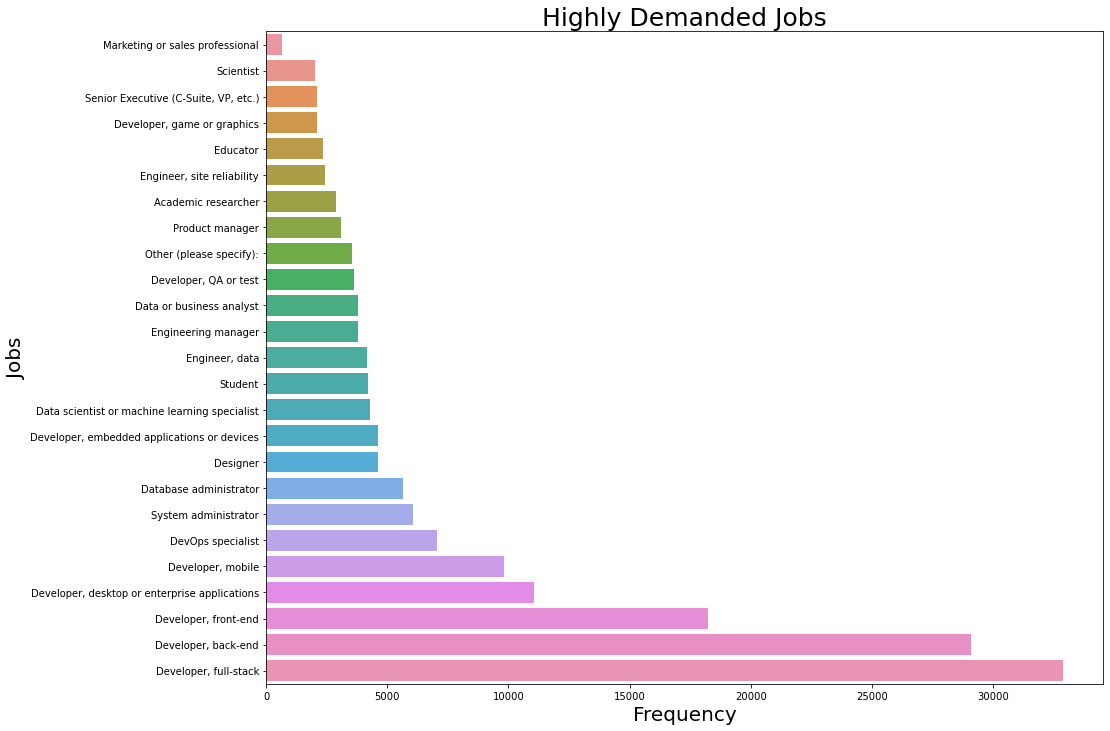

In [27]:
job_freq=df['DevType'].copy().sum().sort_values().reset_index()
job_freq.columns=['Job','Frequency']
plt.figure(figsize=(15,12))
sns.barplot(data=job_freq,y='Job',x='Frequency')
plt.title('Highly Demanded Jobs',fontsize=25)
plt.xlabel('Frequency',fontsize=20)
plt.ylabel('Jobs',fontsize=20)
plt.show()

<Figure size 1080x576 with 0 Axes>

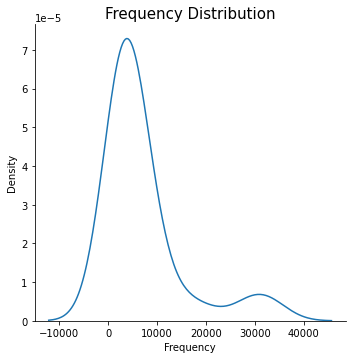

In [28]:
plt.figure(figsize=(15,8))
sns.displot(data=job_freq,x='Frequency',kind='kde')
plt.title('Frequency Distribution',fontsize=15)
plt.show()

### Remarks:

- We can notice in our dataframe that our frequencies are not balanced, check **job_freq data**

### Skills Analysis

In [43]:
df.columns

MultiIndex([(                     'DevType', ...),
            (                     'DevType', ...),
            (                     'DevType', ...),
            (                     'DevType', ...),
            (                     'DevType', ...),
            (                     'DevType', ...),
            (                     'DevType', ...),
            (                     'DevType', ...),
            (                     'DevType', ...),
            (                     'DevType', ...),
            ...
            ('NEWCollabToolsHaveWorkedWith', ...),
            ('NEWCollabToolsHaveWorkedWith', ...),
            ('NEWCollabToolsHaveWorkedWith', ...),
            ('NEWCollabToolsHaveWorkedWith', ...),
            ('NEWCollabToolsHaveWorkedWith', ...),
            ('NEWCollabToolsHaveWorkedWith', ...),
            ('NEWCollabToolsHaveWorkedWith', ...),
            ('NEWCollabToolsHaveWorkedWith', ...),
            ('NEWCollabToolsHaveWorkedWith', ...),
            ('N

In [29]:
skills_freq=df.copy().drop('DevType',axis=1).sum().reset_index()
skills_freq.columns=['Group','Skills','Frequency']
skills_freq.sort_values('Frequency',ascending=False)

Group              Skills  Frequency
133       ToolsTechHaveWorkedWith                 Git      68171
160  NEWCollabToolsHaveWorkedWith  Visual Studio Code      58026
19         LanguageHaveWorkedWith          JavaScript      53587
16         LanguageHaveWorkedWith            HTML/CSS      46259
29         LanguageHaveWorkedWith              Python      39792
..                            ...                 ...        ...
0          LanguageHaveWorkedWith                 APL        536
8          LanguageHaveWorkedWith             Crystal        466
6          LanguageHaveWorkedWith               COBOL        437
135       ToolsTechHaveWorkedWith              Pulumi        368
44         LanguageWantToWorkWith               COBOL        309

[163 rows x 3 columns]

In [31]:
skills_freq.to_pickle("skills_freq.pkl")

In [34]:
group_skills=skills_freq.groupby(skills_freq.columns[0]).apply(lambda x:x[x.columns[1]].tolist()).to_dict()
group_skills

{'DatabaseHaveWorkedWith': ['Cassandra',
  'Couchbase',
  'DynamoDB',
  'Elasticsearch',
  'Firebase',
  'IBM DB2',
  'MariaDB',
  'Microsoft SQL Server',
  'MongoDB',
  'MySQL',
  'Oracle',
  'PostgreSQL',
  'Redis',
  'SQLite'],
 'LanguageHaveWorkedWith': ['APL',
  'Assembly',
  'Bash/Shell',
  'C',
  'C#',
  'C++',
  'COBOL',
  'Clojure',
  'Crystal',
  'Dart',
  'Delphi',
  'Elixir',
  'Erlang',
  'F#',
  'Go',
  'Groovy',
  'HTML/CSS',
  'Haskell',
  'Java',
  'JavaScript',
  'Julia',
  'Kotlin',
  'LISP',
  'Matlab',
  'Node.js',
  'Objective-C',
  'PHP',
  'Perl',
  'PowerShell',
  'Python',
  'R',
  'Ruby',
  'Rust',
  'SQL',
  'Scala',
  'Swift',
  'TypeScript',
  'VBA'],
 'LanguageWantToWorkWith': ['APL',
  'Assembly',
  'Bash/Shell',
  'C',
  'C#',
  'C++',
  'COBOL',
  'Clojure',
  'Crystal',
  'Dart',
  'Delphi',
  'Elixir',
  'Erlang',
  'F#',
  'Go',
  'Groovy',
  'HTML/CSS',
  'Haskell',
  'Java',
  'JavaScript',
  'Julia',
  'Kotlin',
  'LISP',
  'Matlab',
  'Node.js',

In [29]:
import plotly.express as px


In [30]:
fig=px.treemap(skills_freq,
              path=['Group','Skills'],
              color_continuous_scale='deep',
              values='Frequency',color='Frequency')
fig.update_layout(width=1400,height=700)
fig.show()

In [31]:
role_mask=(df[('DevType','Designer')]==1)
role_mask

0        False
1        False
2        False
3        False
4        False
         ...  
83434    False
83435    False
83436    False
83437    False
83438    False
Name: (DevType, Designer), Length: 83439, dtype: bool

In [32]:
sorted_roles=df['DevType'].sum().sort_values().index.tolist()
sorted_skills=df.drop('DevType',axis=1).sum().sort_values(ascending=False).droplevel(level=0).index.tolist()
sorted_roles

['Marketing or sales professional',
 'Scientist',
 'Senior Executive (C-Suite, VP, etc.)',
 'Developer, game or graphics',
 'Educator',
 'Engineer, site reliability',
 'Academic researcher',
 'Product manager',
 'Other (please specify):',
 'Developer, QA or test',
 'Data or business analyst',
 'Engineering manager',
 'Engineer, data',
 'Student',
 'Data scientist or machine learning specialist',
 'Developer, embedded applications or devices',
 'Designer',
 'Database administrator',
 'System administrator',
 'DevOps specialist',
 'Developer, mobile',
 'Developer, desktop or enterprise applications',
 'Developer, front-end',
 'Developer, back-end',
 'Developer, full-stack']

In [33]:
sorted_skills

['Git',
 'Visual Studio Code',
 'JavaScript',
 'HTML/CSS',
 'Python',
 'SQL',
 'JavaScript',
 'Docker',
 'MySQL',
 'Python',
 'HTML/CSS',
 'Java',
 'AWS',
 'PostgreSQL',
 'Node.js',
 'Visual Studio',
 'TypeScript',
 'SQL',
 'React.js',
 'TypeScript',
 'Notepad++',
 'Node.js',
 'IntelliJ',
 'C#',
 'SQLite',
 'Bash/Shell',
 'jQuery',
 'C++',
 'Vim',
 'MongoDB',
 'Microsoft SQL Server',
 'Android Studio',
 'PHP',
 'C#',
 'C',
 'Java',
 'Sublime Text',
 'Google Cloud Platform',
 '.NET Framework',
 'Microsoft Azure',
 'NumPy',
 'Rust',
 'Go',
 'PyCharm',
 '.NET Core / .NET 5',
 'C++',
 'Express',
 'Redis',
 'Angular',
 'Bash/Shell',
 'Pandas',
 'Eclipse',
 'Yarn',
 'Heroku',
 'Kubernetes',
 'MariaDB',
 'Vue.js',
 'ASP.NET Core ',
 'Firebase',
 'Kotlin',
 'Atom',
 'IPython/Jupyter',
 'Flask',
 'ASP.NET',
 'C',
 'DigitalOcean',
 'Django',
 'Elasticsearch',
 'Spring',
 'Xcode',
 'PowerShell',
 'Oracle',
 'PHP',
 'TensorFlow',
 'Go',
 'Angular.js',
 'Unity 3D',
 'React Native',
 'Dart',
 'Kotli

In [34]:
df['LanguageHaveWorkedWith']

APL  Assembly  Bash/Shell  C  C#  C++  COBOL  Clojure  Crystal  Dart  \
0        0         0           0  0   0    1      0        0        0     0   
1        0         0           0  0   0    0      0        0        0     0   
2        0         1           0  1   0    0      0        0        0     0   
3        0         0           0  0   0    0      0        0        0     0   
4        0         0           1  0   0    0      0        0        0     0   
...    ...       ...         ... ..  ..  ...    ...      ...      ...   ...   
83434    0         0           0  0   0    0      0        1        0     0   
83435    0         0           0  0   0    0      0        0        0     0   
83436    0         0           0  0   0    0      0        0        0     0   
83437    0         0           1  0   0    0      0        0        0     0   
83438    0         0           0  0   0    0      0        0        0     0   

       ...  PowerShell  Python  R  Ruby  Rust  SQL  Scala  Swift  TypeScript  \
0      ...           0       0  0     0     0    0      0      1           0   
1      ...           0       1  0     0     0    0      0      0           0   
2      ...           0       1  1     0     1    0      0      0           0   
3      ...           0       0  0     0     0    0      0      0           1   
4      ...           0       1  0     0     0    1      0      0           0   
...    ...         ...     ... ..   ...   ...  ...    ...    ...         ...   
83434  ...           0       0  0     0     0    1      0      0           0   
83435  ...           0       0  0     0     0    0      0      0           0   
83436  ...           0       1  0     0     0    0      0      0           0   
83437  ...           0       1  0     0     0    0      0      0           0   
83438  ...           0       0  0     0     0    0      0      0           0   

       VBA  
0        0  
1        0  
2        0  
3        0  
4        0  
...    ...  
83434    0  
83435    0  
83436    0  
83437    0  
83438    0  

[83439 rows x 38 columns]

In [35]:
role_mask=(df['DevType','Academic researcher']==1)
df.loc[role_mask,'LanguageHaveWorkedWith'].mean()*100

APL             2.690583
Assembly        9.486030
Bash/Shell     36.736806
C              33.011383
C#             17.661263
C++            38.427044
COBOL           1.552259
Clojure         2.794067
Crystal         1.310797
Dart            4.449810
Delphi          2.966540
Elixir          1.724733
Erlang          1.552259
F#              1.621249
Go              8.175233
Groovy          2.621594
HTML/CSS       40.669196
Haskell         4.587789
Java           28.285616
JavaScript     44.394619
Julia           9.520524
Kotlin          6.484995
LISP            4.070369
Matlab         17.661263
Node.js        21.110728
Objective-C     2.863056
PHP            17.040359
Perl            4.622284
PowerShell      9.279062
Python         72.093825
R              24.560193
Ruby            5.277682
Rust           10.796826
SQL            34.356675
Scala           3.621939
Swift           4.104864
TypeScript     16.971369
VBA             5.691618
dtype: float64

In [36]:
skills = []

# For each role, calculate the percentage of each skill
for role in sorted_roles:
    # Filter for the role
    role_mask = (df[('DevType', role)] == 1)

    #For each skill column, calculate mean of the one-hot-encoded -> percentage
    skills_role = pd.concat({tech_col: df.loc[role_mask, tech_col].mean() * 100
                             for tech_col in Tech_cols})

    # Append to original list
    skills.append(skills_role)

# Concat and format
skills = pd.concat(skills, axis=1)
skills.columns = sorted_roles
skills = skills.reset_index(level=0, drop=True)
skills = skills.loc[sorted_skills]
skills = skills.T

In [37]:
import plotly.graph_objects as go

fig=go.Figure(data=go.Heatmap(z=skills,x=skills.columns,y=skills.index,colorscale='magma', ygap=1))
fig.update_layout(width=2500,height=700)
fig.show()

In [38]:
role_names=pd.read_csv('roles_short_names.csv',sep=';')
role_names.columns=['orginal_name','short_name']

In [39]:
roles_dict=role_names.set_index('orginal_name')['short_name'].to_dict()
short_label=[roles_dict[role] for role in sorted_roles ]
short_label

['Marketing/Sales',
 'Scientist',
 'Senior Executive',
 'Game dev',
 'Educator',
 'Site Engineer',
 'Researcher',
 'Product manager',
 'Other',
 'Quality Assurance',
 'Analyst',
 'Engineering manager',
 'Data Engineer',
 'Student',
 'Data Scientist ',
 'Embedded dev',
 'Designer',
 'Database admin',
 'System admin',
 'DevOps',
 'Mobile dev',
 'Desktop dev',
 'Front-end dev',
 'Back-end dev',
 'Full-stack dev']

In [40]:
import plotly.figure_factory as ff
fig = ff.create_dendrogram(skills, labels=short_label, orientation='left', color_threshold=0)
fig.update_layout(height=700, width=1000, showlegend=False)
fig.show()

### Remarks: 
- something weird, backend and front-end should be close or in a cluster, we see here that backend dev are close to quality assurance. 

In [41]:
# let's try a normalization of our skills data 
from sklearn.preprocessing import StandardScaler
norm_skills=StandardScaler().fit_transform(skills)
norm_skills=pd.DataFrame(norm_skills,columns=skills.columns,index=skills.index)
norm_skills

Git  Visual Studio Code  \
Marketing or sales professional               -2.863626           -0.971738   
Scientist                                     -0.385502           -2.485309   
Senior Executive (C-Suite, VP, etc.)           0.254288           -0.178212   
Developer, game or graphics                    0.187448            0.829680   
Educator                                      -0.198089           -0.274405   
Engineer, site reliability                     1.175836            0.070885   
Academic researcher                           -0.717264           -2.124832   
Product manager                                0.043982            0.525832   
Other (please specify):                       -1.599124           -1.002274   
Developer, QA or test                          0.725965            0.371178   
Data or business analyst                      -1.777369           -0.901867   
Engineering manager                            0.994910            0.249268   
Engineer, data                                 0.501396           -0.332933   
Student                                       -0.483508            1.549493   
Data scientist or machine learning specialist  0.105910           -0.862569   
Developer, embedded applications or devices    0.407384           -0.078112   
Designer                                      -0.952329            0.391685   
Database administrator                        -0.304149            0.017999   
System administrator                           0.278077           -0.232423   
DevOps specialist                              1.829968            0.782167   
Developer, mobile                              0.420748            0.782163   
Developer, desktop or enterprise applications -0.107372            0.317467   
Developer, front-end                           0.586880            1.788769   
Developer, back-end                            0.928336            0.287175   
Developer, full-stack                          0.947205            1.480914   

                                               JavaScript  JavaScript  \
Marketing or sales professional                  0.498733    1.098147   
Scientist                                       -2.058913   -1.909302   
Senior Executive (C-Suite, VP, etc.)             0.956276    0.693684   
Developer, game or graphics                     -0.110419   -0.518043   
Educator                                         0.025556    0.309316   
Engineer, site reliability                      -0.174546   -0.772328   
Academic researcher                             -1.888801   -1.700878   
Product manager                                  0.835510    1.037179   
Other (please specify):                         -0.785720   -0.493581   
Developer, QA or test                            0.542215    0.646199   
Data or business analyst                        -0.735652   -0.286025   
Engineering manager                              0.262052    0.115879   
Engineer, data                                  -0.948516   -1.044901   
Student                                          0.073837    0.666977   
Data scientist or machine learning specialist   -1.801552   -1.650683   
Developer, embedded applications or devices     -1.037350   -1.268504   
Designer                                         1.003728    1.174384   
Database administrator                           0.904229    0.710179   
System administrator                             0.555117    0.372510   
DevOps specialist                                0.343063   -0.204680   
Developer, mobile                                0.191451    0.118073   
Developer, desktop or enterprise applications   -0.272186   -0.326639   
Developer, front-end                             1.867790    2.001055   
Developer, back-end                              0.118124   -0.146662   
Developer, full-stack                            1.635974    1.378643   

                                               HTML/CSS  HTML/CSS    Python  \
Marketing or sales 

In [42]:
# let's plot again our dendrogram
fig = ff.create_dendrogram(norm_skills, labels=short_label, orientation='left', color_threshold=0)
fig.update_layout(height=700, width=1000, showlegend=False)
fig.show()


In [43]:
fig=go.Figure(data=go.Heatmap(z=norm_skills,x=skills.columns,y=skills.index,colorscale='magma', ygap=1))
fig.update_layout(width=2500,height=700)
fig.show()

In [44]:
skills

Git  Visual Studio Code  \
Marketing or sales professional                70.062696           61.285266   
Scientist                                      81.687345           52.109181   
Senior Executive (C-Suite, VP, etc.)           84.688540           66.096053   
Developer, game or graphics                    84.375000           72.206439   
Educator                                       82.566484           65.512875   
Engineer, site reliability                     89.011438           67.606209   
Academic researcher                            80.131080           54.294584   
Product manager                                83.702017           70.364346   
Other (please specify):                        75.994358           61.100141   
Developer, QA or test                          86.901135           69.426752   
Data or business analyst                       75.158228           61.708861   
Engineering manager                            88.162730           68.687664   
Engineer, data                                 85.847701           65.158046   
Student                                        81.227609           76.570337   
Data scientist or machine learning specialist  83.992511           61.947110   
Developer, embedded applications or devices    85.406699           66.702914   
Designer                                       79.028410           69.551074   
Database administrator                         82.068966           67.285588   
System administrator                           84.800132           65.767396   
DevOps specialist                              92.079909           71.918390   
Developer, mobile                              85.469388           71.918367   
Developer, desktop or enterprise applications  82.992026           69.101124   
Developer, front-end                           86.248697           78.020953   
Developer, back-end                            87.850435           68.917478   
Developer, full-stack                          87.938950           76.154571   

                                               JavaScript  JavaScript  \
Marketing or sales professional                 71.943574   55.015674   
Scientist                                       42.431762   27.444169   
Senior Executive (C-Suite, VP, etc.)            77.223015   51.307656   
Developer, game or graphics                     64.914773   40.198864   
Educator                                        66.483748   47.783875   
Engineer, site reliability                      64.174837   37.867647   
Academic researcher                             44.394619   29.354950   
Product manager                                 75.829538   54.456734   
Other (please specify):                         57.122708   40.423131   
Developer, QA or test                           72.445306   50.872335   
Data or business analyst                        57.700422   42.325949   
Engineering manager                             69.212598   46.010499   
Engineer, data                                  55.244253   35.368774   
Student                                         67.040841   51.062813   
Data scientist or machine learning specialist   45.401357   29.815118   
Developer, embedded applications or devices     54.219226   33.318834   
Designer                                        77.770549   55.714596   
Database administrator                          76.622458   51.458886   
System administrator                            72.594177   48.363218   
DevOps specialist                               70.147351   43.071692   
Developer, mobile                               68.397959   46.030612   
Developer, desktop or enterprise applications   63.048206   41.953606   
Developer, front-end                            87.740662   63.293292   
Developer, back-end                             67.551856   43.603591   
Developer, full-stack                           85.065823   57.587182   

                                                HTML/CSS   HTML/CSS  \
Ma

## For each Job what is his the most used skills ?

In [45]:
role=np.random.choice(sorted_roles)
print(role)
single_role_skills=pd.concat([skills.loc[role],norm_skills.loc[role]],axis=1)
single_role_skills.columns=['percentage','specifity']
single_role_skills=single_role_skills.sort_values('percentage')



thersh=25

single_role_skills=single_role_skills[single_role_skills['percentage']>thersh]

fig=px.bar(df,
          y=single_role_skills.index,
          x=single_role_skills["percentage"],
          color=single_role_skills['specifity'],
          color_continuous_scale='orrd',
          range_color=[norm_skills.values.min(),norm_skills.values.max()],
          orientation='h')

fig.update_layout(width=800, height=800,title=role)
fig.show()

Developer, front-end


### Analysis on Back-end developer

In [46]:
role='Developer, back-end'
single_role_skills=pd.concat([skills.loc[role],norm_skills.loc[role]],axis=1)
single_role_skills.columns=['percentage','specifity']
single_role_skills=single_role_skills.sort_values('percentage')



thersh=25

single_role_skills=single_role_skills[single_role_skills['percentage']>thersh]

fig=px.bar(df,
          y=single_role_skills.index,
          x=single_role_skills["percentage"],
          color=single_role_skills['specifity'],
          color_continuous_scale='orrd',
          range_color=[norm_skills.values.min(),norm_skills.values.max()],
          orientation='h')

fig.update_layout(width=800, height=800,title=role)
fig.show()

### Remarks: 
- We notice clearly that back-end developer has no specifiq requirement or skills if we compare it to other jobs 

## In this section, i'll try to use some feature engineering

- We can ask some questions, like sometimes developer or data scientist can use Python then R or Julia. Can we try to find correlations between features and then create another ones? 

In [47]:
df_oh=df.copy()

In [48]:
df_oh.head()

DevType                           \
  Academic researcher Data or business analyst   
0                   0                        0   
1                   0                        0   
2                   0                        0   
3                   0                        0   
4                   0                        0   

                                                                        \
  Data scientist or machine learning specialist Database administrator   
0                                             0                      0   
1                                             0                      0   
2                                             0                      0   
3                                             0                      0   
4                                             0                      0   

                                                                        \
  Designer DevOps specialist Developer, QA or test Developer, back-end   
0        0                 0                     0                   0   
1        0                 0                     0                   0   
2        0                 0                     0                   0   
3        0                 0                     0                   0   
4        0                 0                     0                   0   

                                                 \
  Developer, desktop or enterprise applications   
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             1   

                                               ...  \
  Developer, embedded applications or devices  ...   
0                                           0  ...   
1                                           0  ...   
2                                           0  ...   
3                                           0  ...   
4                                           0  ...   

  NEWCollabToolsHaveWorkedWith                                           \
                       RStudio Rider RubyMine Sublime Text TextMate Vim   
0                            0     0        0            0        0   0   
1                            0     0        0            0        0   0   
2                            1     0        0            1        0   0   
3                            0     0        0            0        0   0   
4                            0     0        0            0        0   1   

                                                   
  Visual Studio Visual Studio Code Webstorm Xcode  
0             0                  0        0     1  
1             0                  0        0     0  
2             0                  1        0     0  
3             0                  0        0     0  
4             0                  0        0     0  

[5 rows x 188 columns]

In [49]:
skills_oh=df_oh.drop('DevType',axis=1).copy()
norm_skills_oh=StandardScaler().fit_transform(skills_oh)

In [50]:
norm_skills_oh.T.shape

(163, 83439)

In [51]:
skills_oh.columns

MultiIndex([(      'LanguageHaveWorkedWith',                'APL'),
            (      'LanguageHaveWorkedWith',           'Assembly'),
            (      'LanguageHaveWorkedWith',         'Bash/Shell'),
            (      'LanguageHaveWorkedWith',                  'C'),
            (      'LanguageHaveWorkedWith',                 'C#'),
            (      'LanguageHaveWorkedWith',                'C++'),
            (      'LanguageHaveWorkedWith',              'COBOL'),
            (      'LanguageHaveWorkedWith',            'Clojure'),
            (      'LanguageHaveWorkedWith',            'Crystal'),
            (      'LanguageHaveWorkedWith',               'Dart'),
            ...
            ('NEWCollabToolsHaveWorkedWith',            'RStudio'),
            ('NEWCollabToolsHaveWorkedWith',              'Rider'),
            ('NEWCollabToolsHaveWorkedWith',           'RubyMine'),
            ('NEWCollabToolsHaveWorkedWith',       'Sublime Text'),
            ('NEWCollabToolsHave

## Dimensionnality Reduction

In [52]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,
         perplexity=3,
         learning_rate=0.01,
         init='pca',
         method='barnes_hut',
         n_jobs=2,
         n_iter=10**10,
         random_state=0).fit_transform(norm_skills.T)
tsne=pd.DataFrame(tsne)

C:\Users\adminn\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



In [53]:
print(len(norm_skills.columns))

239


In [54]:
tsne.index=norm_skills.columns

In [55]:
tsne

0            1
Git                -1370.361084  4495.266602
Visual Studio Code -4806.507812   726.013733
JavaScript         -4508.860840 -1796.927368
JavaScript         -3657.054443 -2121.365723
HTML/CSS           -3245.739746 -2403.422363
...                         ...          ...
COBOL               1631.318604   981.322266
COBOL               1850.289062  -960.154236
Pulumi               863.928711  3053.546143
COBOL               1631.318604   981.322266
COBOL               1999.275146  -977.107544

[239 rows x 2 columns]

In [56]:
fig=px.scatter(x=tsne[0],y=tsne[1],text=tsne.index)
fig.update_traces(textposition='top center')
fig.update_layout(height=1000,width=1000,title_text='TSNE')
fig.show()

## Creating Clusters

In [57]:
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.metrics import silhouette_score


In [58]:
range_n_cluster=list(range(10,25))
silh_score=[]
best_model=None

for n in range_n_cluster:
    cluster_model=KMeans(n_clusters=n)
    cluster_label=cluster_model.fit_predict(tsne)
    
    silhouette=silhouette_score(tsne,cluster_label)
    silh_score.append(silhouette)
    
    if silhouette>=np.max(silh_score):
        best_model=cluster_model

C:\Users\adminn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\adminn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\adminn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\adminn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

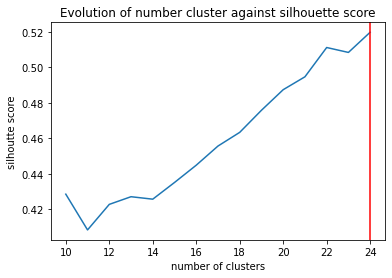

In [59]:
plt.plot(range_n_cluster,silh_score)
plt.axvline(best_model.n_clusters,color='red')
plt.title("Evolution of number cluster against silhouette score")
plt.xlabel('number of clusters')
plt.ylabel('silhoutte score')
plt.show()

### Creating clusters

In [60]:
best_model.labels_

array([17, 22, 21, 21, 21, 21,  0,  0, 11, 11, 21, 21, 17, 11,  0,  0, 21,
       21,  1,  1, 17, 17,  4, 21, 19, 22, 22, 11, 11,  4, 22, 22, 19,  4,
       21,  1, 19, 19,  2, 10, 10, 11, 13, 13, 10,  4, 11,  7, 11, 11, 19,
       19, 13, 13,  1,  1, 23,  3, 19, 11, 16, 10, 10, 17, 17,  0, 19, 13,
       13,  4, 17, 22, 10, 10, 16, 19,  4,  4, 17, 11,  4, 19,  7, 12, 12,
       23, 16,  0, 19, 13, 13, 20,  0, 17,  1,  2,  5,  5, 11, 11, 11, 16,
       17, 17, 22,  8,  7,  7,  7, 12, 12,  7,  4, 11,  2,  2, 11, 19, 10,
       10, 17, 20, 20, 17, 17,  7,  7, 20, 20, 16,  5,  5, 13, 16, 13, 13,
       20, 18,  2,  2,  6,  6, 10,  6,  6,  8,  8, 14, 14, 13, 13,  2, 18,
       18, 20, 20, 19,  6,  0,  0,  2,  0,  1,  5,  5,  0, 14,  6, 11,  3,
        3,  8,  2,  2,  9,  5,  0,  0,  0, 10, 10,  3, 18, 18,  9, 12, 12,
       14, 14,  3,  3, 18, 18,  9,  8, 20, 20,  2,  2, 15, 15, 23, 15, 20,
        5,  5, 10, 10,  9, 18, 18,  8,  8, 14,  6,  9,  9, 15, 12, 12,  9,
        9,  5,  9, 15,  9

In [61]:
labels=['skills_group'+str(label) for label in best_model.labels_]
labels

['skills_group17',
 'skills_group22',
 'skills_group21',
 'skills_group21',
 'skills_group21',
 'skills_group21',
 'skills_group0',
 'skills_group0',
 'skills_group11',
 'skills_group11',
 'skills_group21',
 'skills_group21',
 'skills_group17',
 'skills_group11',
 'skills_group0',
 'skills_group0',
 'skills_group21',
 'skills_group21',
 'skills_group1',
 'skills_group1',
 'skills_group17',
 'skills_group17',
 'skills_group4',
 'skills_group21',
 'skills_group19',
 'skills_group22',
 'skills_group22',
 'skills_group11',
 'skills_group11',
 'skills_group4',
 'skills_group22',
 'skills_group22',
 'skills_group19',
 'skills_group4',
 'skills_group21',
 'skills_group1',
 'skills_group19',
 'skills_group19',
 'skills_group2',
 'skills_group10',
 'skills_group10',
 'skills_group11',
 'skills_group13',
 'skills_group13',
 'skills_group10',
 'skills_group4',
 'skills_group11',
 'skills_group7',
 'skills_group11',
 'skills_group11',
 'skills_group19',
 'skills_group19',
 'skills_group13',
 'skil

In [62]:
fig = px.scatter(x=tsne[0], 
                 y=tsne[1], 
                 text=tsne.index, 
                 color=labels)
fig.update_traces(textposition='top center')
fig.update_layout(height=800, width=800, title_text='Cluster')
fig.show()

In [63]:
tsne.index

Index(['Git', 'Visual Studio Code', 'JavaScript', 'JavaScript', 'HTML/CSS',
       'HTML/CSS', 'Python', 'Python', 'SQL', 'SQL',
       ...
       'APL', 'APL', 'APL', 'Crystal', 'Crystal', 'COBOL', 'COBOL', 'Pulumi',
       'COBOL', 'COBOL'],
      dtype='object', length=239)

In [64]:
skills_clusters = tsne.index.to_series().groupby(labels).apply(list)
for c,s in skills_clusters.items():
    #print(c)
    #print('----------------')
    print(s)

['Python', 'Python', 'Python', 'Python', 'PyCharm', 'Flask', 'Django', 'Scala', 'Scala', 'Apache Spark', 'FastAPI', 'Hadoop', 'Scala', 'Scala']
['Java', 'Java', 'IntelliJ', 'Java', 'Java', 'Spring', 'Gatsby']
['Bash/Shell', 'Bash/Shell', 'Vim', 'Rust', 'Rust', 'Bash/Shell', 'Bash/Shell', 'Rust', 'Rust', 'Neovim', 'Perl', 'Perl', 'Perl', 'Perl']
['SQL', 'SQL', 'MySQL', 'SQL', 'SQL', 'jQuery', 'Microsoft SQL Server', 'PHP', 'PHP', 'Microsoft Azure', 'MariaDB', 'Oracle', 'PHP', 'PHP', 'Laravel', 'PHPStorm', 'Symfony']
['Kotlin', 'Kotlin', 'Kotlin', 'Kotlin', 'Delphi', 'Delphi', 'Delphi', 'Delphi']
['C++', 'C++', 'C', 'C', 'C++', 'C++', 'C', 'C', 'Qt', 'Assembly', 'Assembly', 'Assembly', 'Assembly']
['Matlab', 'Matlab', 'Julia', 'Matlab', 'Matlab', 'Julia']
['Erlang', 'Erlang', 'Puppet', 'Chef', 'Crystal', 'Erlang', 'Erlang', 'Crystal', 'Pulumi']
['NumPy', 'Pandas', 'IPython/Jupyter', 'TensorFlow', 'Keras', 'Torch/PyTorch']
['Git', 'Docker', 'AWS', 'PostgreSQL', 'Go', 'Go', 'Redis', 'Kuber

In [65]:
skills_oh.droplevel(0,axis=1)['R'].sum(axis=1)

0        0
1        0
2        1
3        0
4        0
        ..
83434    0
83435    0
83436    0
83437    0
83438    0
Length: 83439, dtype: int64

In [66]:
new_feat=[]

for c,s in skills_clusters.items():
    clust_sum=skills_oh.droplevel(0,axis=1)[s].sum(axis=1)
    clust_sum.name=c
    new_feat.append(clust_sum)
    
fe_clustered_skills=pd.concat(new_feat,axis=1)

In [67]:
fe_clustered_skills

skills_group0  skills_group1  skills_group10  skills_group11  \
0                  0              0               0               7   
1                  6              1               0               0   
2                 10              0               8               0   
3                  0              0               0               1   
4                 12              0               9               8   
...              ...            ...             ...             ...   
83434              0              1               1               5   
83435              2              1               1               5   
83436             12              9               1               0   
83437              7              0               8               0   
83438              0             10               0              10   

       skills_group12  skills_group13  skills_group14  skills_group15  \
0                   0               4               0               0   
1                   0               0               0               0   
2                   0               8               2               0   
3                   0               0               0               0   
4                   0               0               0               0   
...               ...             ...             ...             ...   
83434               4               0               0               0   
83435               0               1               0               0   
83436               0               0               0               0   
83437               0               0               0               0   
83438               4               0               0               0   

       skills_group16  skills_group17  ...  skills_group21  skills_group22  \
0                   0               1  ...               8               0   
1                   0               3  ...               4               1   
2                   5               0  ...               0               1   
3                   0               0  ...               8               9   
4                   3               6  ...               8               0   
...               ...             ...  ...             ...             ...   
83434               0               3  ...               0               1   
83435               0               3  ...               0               1   
83436               4               9  ...               0               1   
83437               4              11  ...               6               0   
83438               0               3  ...              18               6   

       skills_group23  skills_group3  skills_group4  skills_group5  \
0                   0              0              0              0   
1                   0              0              2              0   
2                   1              0              1              0   
3                   0              0              0              0   
4                   1              0              1              0   
...               ...            ...            ...            ...   
83434               1              8              0              0   
83435               1              0              1              0   
83436               1              1              1              4   
83437               1              1              6              0   
83438               0              0              2              0   

       skills_group6  skills_group7  skills_group8  skills_group9  
0                  0              0              0              0  
1                  0              1              0              0  
2                  7              0              0              0  
3                  0              0              0              0  
4                  0              0              0              0  
...              ...            ...            ...            ...  
83434              0   

## Model try

- comparison between model before feature engineering and after

In [68]:
combined_data=pd.concat([fe_clustered_skills,skills_oh.droplevel(0,axis=1)],axis=1)
combined_data

skills_group0  skills_group1  skills_group10  skills_group11  \
0                  0              0               0               7   
1                  6              1               0               0   
2                 10              0               8               0   
3                  0              0               0               1   
4                 12              0               9               8   
...              ...            ...             ...             ...   
83434              0              1               1               5   
83435              2              1               1               5   
83436             12              9               1               0   
83437              7              0               8               0   
83438              0             10               0              10   

       skills_group12  skills_group13  skills_group14  skills_group15  \
0                   0               4               0               0   
1                   0               0               0               0   
2                   0               8               2               0   
3                   0               0               0               0   
4                   0               0               0               0   
...               ...             ...             ...             ...   
83434               4               0               0               0   
83435               0               1               0               0   
83436               0               0               0               0   
83437               0               0               0               0   
83438               4               0               0               0   

       skills_group16  skills_group17  ...  RStudio  Rider  RubyMine  \
0                   0               1  ...        0      0         0   
1                   0               3  ...        0      0         0   
2                   5               0  ...        1      0         0   
3                   0               0  ...        0      0         0   
4                   3               6  ...        0      0         0   
...               ...             ...  ...      ...    ...       ...   
83434               0               3  ...        0      0         0   
83435               0               3  ...        1      0         0   
83436               4               9  ...        0      0         0   
83437               4              11  ...        0      0         0   
83438               0               3  ...        0      0         0   

       Sublime Text  TextMate  Vim  Visual Studio  Visual Studio Code  \
0                 0         0    0              0                   0   
1                 0         0    0              0                   0   
2                 1         0    0              0                   1   
3                 0         0    0              0                   0   
4                 0         0    1              0                   0   
...             ...       ...  ...            ...                 ...   
83434             1         0    1              0                   1   
83435             1         0    1              1                   1   
83436             1         0    1              0                   1   
83437             1         0    0              0                   0   
83438             0         0    0              0                   1   

       Webstorm  Xcode  
0             0      1  
1             0      0  
2             0      0  
3             0      0  
4             0      0  
...         ...    ...  
83434         0      0  
83435         0      0  
83436         0      1  
83437         0      0  
83438         0      0  

[83439 rows x 187 columns]

In [69]:
df_oh

DevType                           \
      Academic researcher Data or business analyst   
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   
...                   ...                      ...   
83434                   0                        0   
83435                   0                        0   
83436                   0                        0   
83437                   0                        0   
83438                   0                        0   

                                                                            \
      Data scientist or machine learning specialist Database administrator   
0                                                 0                      0   
1                                                 0                      0   
2                                                 0                      0   
3                                                 0                      0   
4                                                 0                      0   
...                                             ...                    ...   
83434                                             0                      0   
83435                                             0                      0   
83436                                             1                      0   
83437                                             0                      0   
83438                                             0                      0   

                                                                            \
      Designer DevOps specialist Developer, QA or test Developer, back-end   
0            0                 0                     0                   0   
1            0                 0                     0                   0   
2            0                 0                     0                   0   
3            0                 0                     0                   0   
4            0                 0                     0                   0   
...        ...               ...                   ...                 ...   
83434        0                 0                     0                   1   
83435        0                 0                     0                   0   
83436        0                 1                     0                   0   
83437        0                 0                     0                   1   
83438        0                 0                     0                   1   

                                                     \
      Developer, desktop or enterprise applications   
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 1   
...                                             ...   
83434                                             0   
83435                                             0   
83436                                             0   
83437                                             0   
83438                                             0   

                                                   ...  \
      Developer, embedded applications or devices  ...   
0                                               0  ...   
1                                               0  ...   
2                                               0  ...   
3                                               0  ...   
4                                               0  ...   
...                                           ...  ...   
83434                                           0  ...   
83435                                          

In [70]:
role_df=df_oh['DevType'].copy()
role_df

Academic researcher  Data or business analyst  \
0                        0                         0   
1                        0                         0   
2                        0                         0   
3                        0                         0   
4                        0                         0   
...                    ...                       ...   
83434                    0                         0   
83435                    0                         0   
83436                    0                         0   
83437                    0                         0   
83438                    0                         0   

       Data scientist or machine learning specialist  Database administrator  \
0                                                  0                       0   
1                                                  0                       0   
2                                                  0                       0   
3                                                  0                       0   
4                                                  0                       0   
...                                              ...                     ...   
83434                                              0                       0   
83435                                              0                       0   
83436                                              1                       0   
83437                                              0                       0   
83438                                              0                       0   

       Designer  DevOps specialist  Developer, QA or test  \
0             0                  0                      0   
1             0                  0                      0   
2             0                  0                      0   
3             0                  0                      0   
4             0                  0                      0   
...         ...                ...                    ...   
83434         0                  0                      0   
83435         0                  0                      0   
83436         0                  1                      0   
83437         0                  0                      0   
83438         0                  0                      0   

       Developer, back-end  Developer, desktop or enterprise applications  \
0                        0                                              0   
1                        0                                              0   
2                        0                                              0   
3                        0                                              0   
4                        0                                              1   
...                    ...                                            ...   
83434                    1                                              0   
83435                    0                                              0   
83436                    0                                              0   
83437                    1                                              0   
83438                    1                                              0   

       Developer, embedded applications or devices  ...  Engineer, data  \
0                                                0  ...               0   
1                                                0  ...               0   
2                                                0  ...               0   
3                                                0  ...               0   
4                                                0  ...               1   
...                                            ...  ...             ...   
83434                                            0  ...               0   
83435                                            0  ...               0   
83436                                   

In [71]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(combined_data,role_df,train_size=0.7,random_state=0)

In [72]:
df_=pd.DataFrame(role_df.sum(axis=0),columns=['count_number']).reset_index()
df_

index  count_number
0                             Academic researcher          2899
1                        Data or business analyst          3792
2   Data scientist or machine learning specialist          4273
3                          Database administrator          5655
4                                        Designer          4611
5                               DevOps specialist          7058
6                           Developer, QA or test          3611
7                             Developer, back-end         29071
8   Developer, desktop or enterprise applications         11036
9     Developer, embedded applications or devices          4598
10                           Developer, front-end         18231
11                          Developer, full-stack         32891
12                    Developer, game or graphics          2112
13                              Developer, mobile          9800
14                                       Educator          2369
15                                 Engineer, data          4176
16                     Engineer, site reliability          2448
17                            Engineering manager          3810
18                Marketing or sales professional           638
19                        Other (please specify):          3545
20                                Product manager          3074
21                                      Scientist          2015
22           Senior Executive (C-Suite, VP, etc.)          2103
23                                        Student          4187
24                           System administrator          6079

###  Deal with imbalance classes

In [73]:
class_weight=(1/role_df.sum(axis=0))
sample_weight=np.multiply(class_weight.values,y_train.values).sum(axis=1)
sample_weight

array([3.04034538e-05, 2.17485863e-04, 8.52550802e-05, ...,
       0.00000000e+00, 7.25866511e-03, 3.43985415e-05])

In [74]:
features_set={"original":skills_oh.droplevel(0,axis=1).columns.tolist(),
             'clusters':fe_clustered_skills.columns.tolist()}
features_set

{'original': ['APL',
  'Assembly',
  'Bash/Shell',
  'C',
  'C#',
  'C++',
  'COBOL',
  'Clojure',
  'Crystal',
  'Dart',
  'Delphi',
  'Elixir',
  'Erlang',
  'F#',
  'Go',
  'Groovy',
  'HTML/CSS',
  'Haskell',
  'Java',
  'JavaScript',
  'Julia',
  'Kotlin',
  'LISP',
  'Matlab',
  'Node.js',
  'Objective-C',
  'PHP',
  'Perl',
  'PowerShell',
  'Python',
  'R',
  'Ruby',
  'Rust',
  'SQL',
  'Scala',
  'Swift',
  'TypeScript',
  'VBA',
  'APL',
  'Assembly',
  'Bash/Shell',
  'C',
  'C#',
  'C++',
  'COBOL',
  'Clojure',
  'Crystal',
  'Dart',
  'Delphi',
  'Elixir',
  'Erlang',
  'F#',
  'Go',
  'Groovy',
  'HTML/CSS',
  'Haskell',
  'Java',
  'JavaScript',
  'Julia',
  'Kotlin',
  'LISP',
  'Matlab',
  'Node.js',
  'Objective-C',
  'PHP',
  'Perl',
  'PowerShell',
  'Python',
  'R',
  'Ruby',
  'Rust',
  'SQL',
  'Scala',
  'Swift',
  'TypeScript',
  'VBA',
  'Cassandra',
  'Couchbase',
  'DynamoDB',
  'Elasticsearch',
  'Firebase',
  'IBM DB2',
  'MariaDB',
  'Microsoft SQL Serv

In [75]:
X_train['JavaScript']

JavaScript  JavaScript
25886           1           0
17338           0           0
26357           1           1
8143            1           1
45405           0           1
...           ...         ...
21243           1           1
45891           1           1
42613           1           1
43567           1           1
68268           1           1

[58407 rows x 2 columns]

In [76]:
def f1_from_confusion_matrix(confusion_matrix):
    return (confusion_matrix[1,1] / 
            (confusion_matrix[1,1] + 
             (0.5 * (confusion_matrix[0,1] + confusion_matrix[1,0]))
            ))

In [77]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import f1_score
results ={}

for feature_name, features_set in features_set.items():
    
    sub_train=X_train[features_set].copy()
    sub_test=X_test[features_set].copy()
    
    clf=MultiOutputClassifier(LogisticRegression())
    clf.fit(sub_train,y_train,sample_weight=sample_weight)
    
    multilab_cm=multilabel_confusion_matrix(y_train,clf.predict(sub_train))
    f1_train_score=[f1_from_confusion_matrix(matrix) 
                       for matrix in multilab_cm]
    
    multilab_cm=multilabel_confusion_matrix(y_test,clf.predict(sub_test))
    f1_test_score=[f1_from_confusion_matrix(matrix) 
                       for matrix in multilab_cm]
    
    result_df=pd.DataFrame({"train":f1_train_score,'test':f1_test_score},
                          index=role_df.columns.to_list())
    
    results[feature_name]=result_df.sort_values('test')
    
    print('Feature set'+feature_name)
    print('Mean train F1 {}'.format(np.mean(f1_train_score)))
    print('Mean test F1 {}'.format(np.mean(f1_test_score)))


Feature setoriginal
Mean train F1 0.14373157200425649
Mean test F1 0.1425994198117073
Feature setclusters
Mean train F1 0.1811714645228143
Mean test F1 0.1853280673216928


In [78]:
fe_clustered_skills.to_pickle('features_skills_clusters.pkl')

In [79]:
import yaml
description_path = os.path.join("features_skills_clusters_description.yaml")
with open(description_path, 'w') as outfile:
    yaml.dump(skills_clusters.to_dict(), outfile)

NameError: name 'os' is not defined

In [49]:
selected_skills={
"Database you have worked with":['MySql'],
"Language you have worked with":['Python'],
"Language you want to work with:":[],
"other Technology that you have worked with":[],
"Collaboration tools that you have worked with":[],
"Plateform that you have worked with":[],
"Tools that you have worked with":[],
"Web framework that you have worked with":[]
}

l=list(dic.values())
len(l)

8

In [52]:
current_skills=[]

for group,skills in selected_skills.items():

    if len(selected_skills[group])==0:
        continue
    else:

        for skill in skills:
            current_skills.append(skill)
        
current_skills

['MySql', 'Python']

In [53]:
current_skills = [skill for group, skills in selected_skills.items() if len(skills) != 0 for skill in skills]
current_skills

['MySql', 'Python']